Figure 3 aims to show the power of representation. Acc is the actual accuracy, while \hat{Acc} is the predicted accuracy from representations. Note here the accuracy is evaluated on the full dataset (including both training and test).

In [28]:
from ipynb.fs.full.train_add import train_add

In [29]:
dic = train_add(steps=5000, loss_type="MSE", train_num=45)

Using device: cpu
train_num=45
seed=58
steps=5000
----------------------------------------
Task 1: Analyzing the dataset before training...
acc_ideal_test = 10/10=1.0
the degree of freedom (except translation/scaling) for the reprsentation is 0
dof=0 means the linear repr is the unique repr, while dof>0 means existence of other reprs
----------------------------------------
Task 2: Training with neural network...
step: 0  | loss: 0.98126626 
step: 1000  | loss: 0.43041232 
step: 2000  | loss: 0.10177844 
step: 3000  | loss: 0.02234226 
step: 4000  | loss: 0.00274835 
final train acc=1.0000, test acc=1.0000, RQI=1.0000
Steps to reach thresholds: train acc=1130, test acc=1529, RQI=800
----------------------------------------
Task 3: Training with effective loss...
step: 0  | loss: 397.76652391 
step: 1000  | loss: 0.03198431 
step: 2000  | loss: 0.00000004 
step: 3000  | loss: 0.00000000 
step: 4000  | loss: 0.00000000 
saving trajectories...


The following three quantities are: training fraction, accuracy (predicted from representation) and real accuracy. We expect the second and third quantity are approximately the same, both of which are larger than the first quantity. 

In [30]:
dic["train_ratio"], dic["pred_acc"], dic["acc"][-1]

(0.8181818181818182, 1.0, 1.0)

Let's try more random seeds and data size! Our experience is that it may be better to parallelize these tasks to multiple CPUs (since this task is quite toy), instead of running them seqentially on a single GPU. It takes about 5 minutes on a personal laptop.

In [ ]:
import numpy as np
from multiprocess import Pool
import os
import sys


path = "./results/fig3/"
isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)
    
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

def train_many(params):
    train_num = int(params[0])
    seed = int(params[1])
    print("train_num={}, seed={}".format(train_num, seed))
    with HiddenPrints():
        dic = train_add(train_num=train_num, seed=seed, steps=5000, eff_steps=1)
    np.savetxt(path+"trainfrac_num_%d_seed_%d.txt"%(train_num, seed), np.array([dic["train_ratio"]]))
    np.savetxt(path+"predacc_num_%d_seed_%d.txt"%(train_num, seed), np.array([dic["pred_acc"]]))
    np.savetxt(path+"realacc_num_%d_seed_%d.txt"%(train_num, seed), np.array([dic["acc"][-1]]))
    #dic["train_ratio"], dic["pred_acc"], dic["acc"][-1]

train_nums = [5,10,15,20,25,30,35,40,45,50,54]
seeds = [0,1,2]

xx, yy = np.meshgrid(train_nums, seeds)
params = list(np.transpose(np.array([xx.reshape(-1,), yy.reshape(-1,)])))


if __name__ == '__main__':
    with Pool(11) as p:
        p.map(train_many, params)

In [4]:
import numpy as np

path = "./results/fig3/"
train_nums = [5,10,15,20,25,30,35,40,45,50,54]
seeds = [0,1,2]

def load_data(train_num, seed):
    trainfrac = np.loadtxt(path+"trainfrac_num_%d_seed_%d.txt"%(train_num, seed))
    predacc = np.loadtxt(path+"predacc_num_%d_seed_%d.txt"%(train_num, seed))
    realacc = np.loadtxt(path+"realacc_num_%d_seed_%d.txt"%(train_num, seed))
    return trainfrac, realacc, predacc

trainfracs = []
realaccs = []
predaccs = []
for train_num in train_nums:
    for seed in seeds:
        trainfrac, realacc, predacc = load_data(train_num, seed)
        trainfracs.append(trainfrac); realaccs.append(realacc); predaccs.append(predacc)
        


The points are above the line


Text(0.5, 1.0, 'Figure 3 (a)')

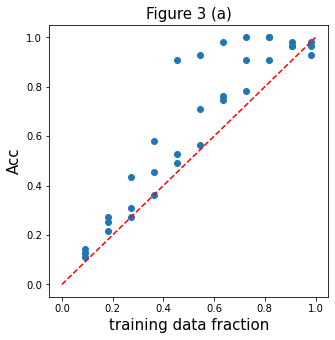

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
fontsize = 15
# Figure 3a
plt.scatter(trainfracs, realaccs)
plt.plot([0.,1],[0,1], ls="--", color="red")
plt.xlabel("training data fraction", fontsize=fontsize)
plt.ylabel("Acc", fontsize=fontsize)
print("The points are above the line")

plt.title("Figure 3 (a)", fontsize=fontsize)

The points are above the line


Text(0.5, 1.0, 'Figure 3 (b)')

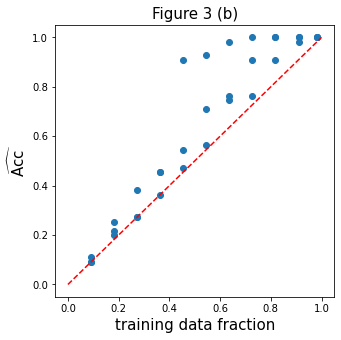

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
fontsize = 15
# Figure 3b
plt.scatter(trainfracs, predaccs)
plt.plot([0.,1],[0,1], ls="--", color="red")
plt.xlabel("training data fraction", fontsize=fontsize)
plt.ylabel(r"$\widehat{\rm Acc}$", fontsize=fontsize)
print("The points are above the line")

plt.title("Figure 3 (b)", fontsize=fontsize)

The points are approximately on the line


Text(0.5, 1.0, 'Figure 3 (c)')

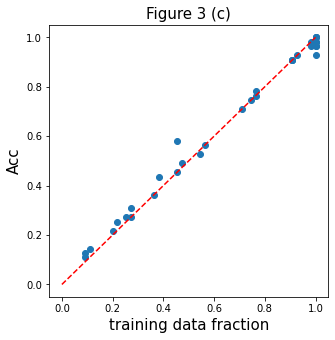

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
fontsize = 15
# Figure 3c
plt.scatter(predaccs, realaccs)
plt.plot([0.,1],[0,1], ls="--", color="red")
plt.xlabel("training data fraction", fontsize=fontsize)
plt.ylabel("Acc", fontsize=fontsize)
print("The points are approximately on the line")

plt.title("Figure 3 (c)", fontsize=fontsize)